In [2]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense,Input

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

Actual Lable : 9


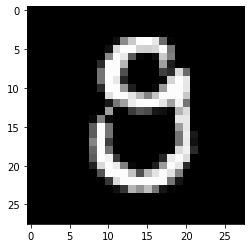

In [7]:
print("Actual Lable :", y_train[80])
plt.imshow(x_train[80], cmap="gray")

### Create model

In [8]:
def create_model_1():
    model = Sequential()  # MLP Model
    model.add(Dense(20, activation="sigmoid", input_shape=(28*28,)))
    model.add(Dense(32, activation="sigmoid"))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=["accuracy"])
    model.summary()
    return model

model_1 = create_model_1()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 16,702
Trainable params: 16,702
Non-trainable params: 0
_________________________________________________________________


In [9]:
y_train.shape

(60000,)

###  Covert lables to one-hot vectors for MLP model training

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train_vecs = to_categorical(y_train, num_classes=10)
y_test_vecs = to_categorical(y_test,num_classes=10 )
print(y_train_vecs.shape, y_test_vecs.shape)

(60000, 10) (10000, 10)


In [13]:
# Inspect vectors
y_test_vecs[0], y_test[0]

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32), 7)

### Let's train the model

In [14]:
history = model_1.fit(x=x_train.reshape((60000, 28*28)), 
          y=y_train_vecs, 
          batch_size=64, 
          epochs=20, 
          verbose=1,
         validation_data=(x_test.reshape((10000, 28*28)), y_test_vecs))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 5s 78us/sample - loss: 2.0916 - acc: 0.4632 - val_loss: 1.8798 - val_acc: 0.6449
Epoch 2/20
60000/60000 [==============================] - 5s 80us/sample - loss: 1.6939 - acc: 0.6765 - val_loss: 1.5100 - val_acc: 0.7030
Epoch 3/20
60000/60000 [==============================] - 4s 71us/sample - loss: 1.3540 - acc: 0.7287 - val_loss: 1.2133 - val_acc: 0.7566
Epoch 4/20
60000/60000 [==============================] - 4s 62us/sample - loss: 1.1145 - acc: 0.7684 - val_loss: 1.0179 - val_acc: 0.7978
Epoch 5/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.9464 - acc: 0.7982 - val_loss: 0.8974 - val_acc: 0.8056
Epoch 6/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.8337 - acc: 0.8151 - val_loss: 0.7927 - val_acc: 0.8197
Epoch 7/20
60000/60000 [==============================] - 4s 66us/sa

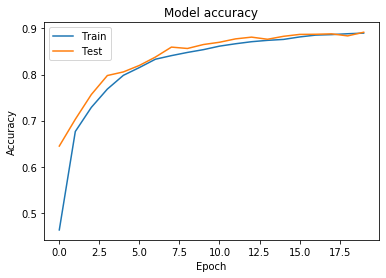

In [15]:
# Plot training & validation accuracy values
def plot_keras_history(h):
    plt.plot(h.history['acc'])
    plt.plot(h.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_keras_history(history)

### Let's examine few good and bad cases for which our model works and doesn't  work

In [16]:
y_pred = model_1.predict_classes(x_test.reshape((10000,28*28)))  ## predict_classes can directly give us predicted class
print(y_pred.shape)

(10000,)


In [18]:
## First 20 examples
n = 20
i = 0
good_cases = []
for y_hat , y in zip(y_pred, y_test):
    if y_hat == y:
        good_cases.append(i)
        if len(good_cases) == n:
            break  
    i += 1
    
i = 0
bad_cases = []
for y_hat , y in zip(y_pred, y_test):
    if y_hat != y:
        bad_cases.append(i)
        if len(bad_cases) == n:
            break  
    i += 1

print(good_cases ,"\n", bad_cases)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20] 
 [18, 33, 62, 77, 87, 92, 104, 124, 125, 149, 150, 151, 172, 185, 187, 195, 217, 233, 235, 241]


### Now Let's visualize them

In [35]:
def show_mnist(data, y_pred, y_true, n_rows=0, n_cols=0, title=""):
    n = len(data)
    assert n==n_rows*n_cols , "n_rows*n_cols should be equal to nun of samples"
    
    fig, axs = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, squeeze=False, figsize=(20,15))
    
    fig.suptitle(title)
    
    for i in range(n_rows):
        for j in range(n_cols):
            m = i*n_cols + j
            img = data[m]
            sub_title = "y_true:{}, predicted:{}".format(y_true[m], y_pred[m])
            axs[i,j].imshow(img, cmap="gray")
            axs[i,j].title.set_text(sub_title)
            

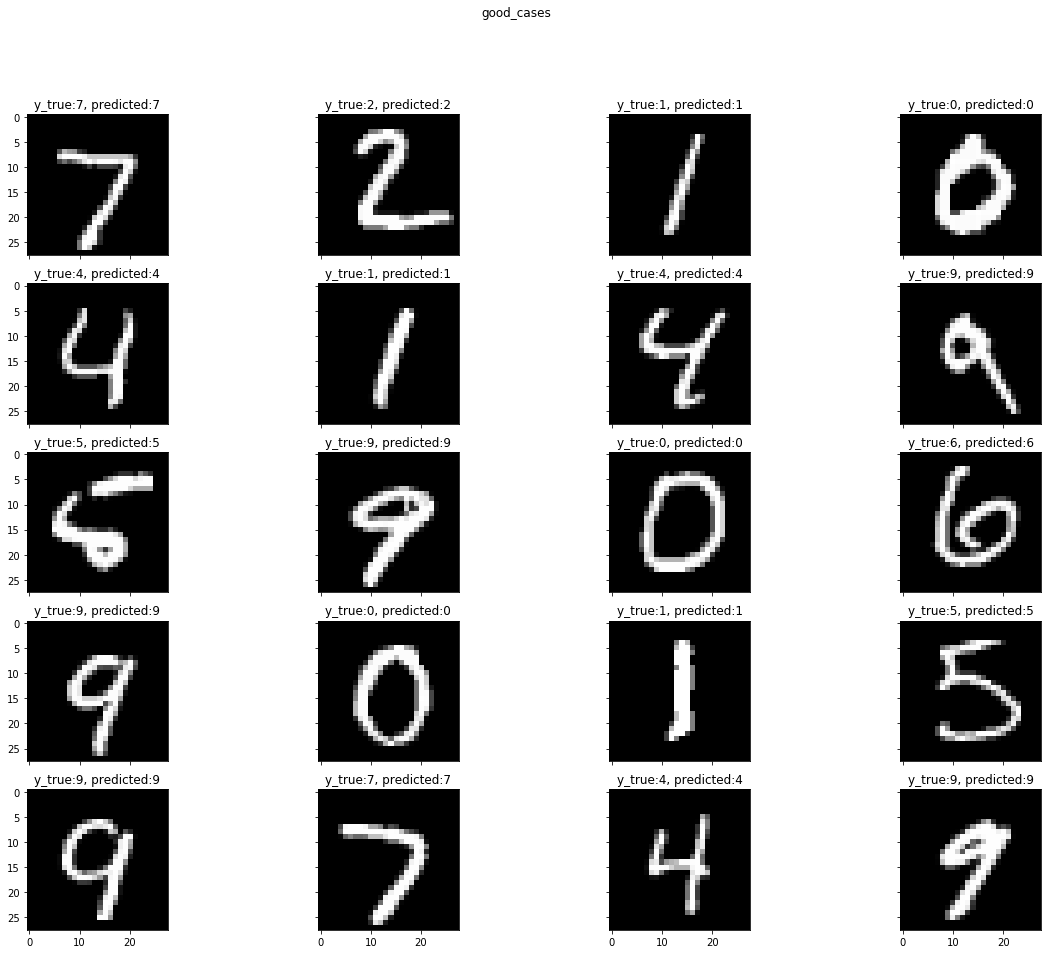

In [36]:
show_mnist(x_test[good_cases], 
           y_pred[good_cases], 
           y_test[good_cases],
           n_rows=5, n_cols=4,
           title= "good_cases")

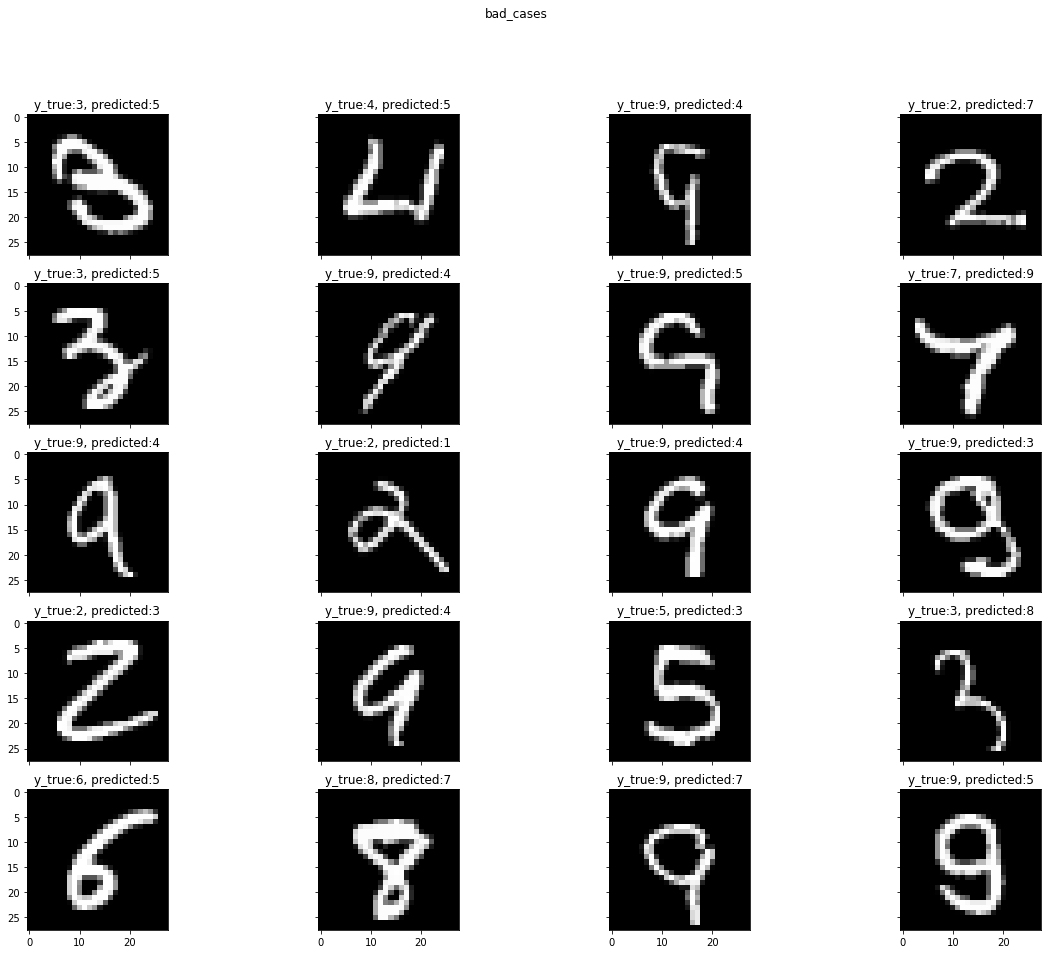

In [37]:
show_mnist(x_test[bad_cases], 
           y_pred[bad_cases], 
           y_test[bad_cases],
           n_rows=5, n_cols=4,
           title= "bad_cases")


## Second Try

Let's do a second try to improve the performance of this model


#### Let's examine the data once again

In [39]:
np.max(x_train) , np.max(x_test)

(255, 255)

- As shown above the image contains gray scale values in integer format

- let's scale them back to -1 to +1 range and try again

In [46]:
x_train_new = x_train / 255
x_test_new = x_test / 255

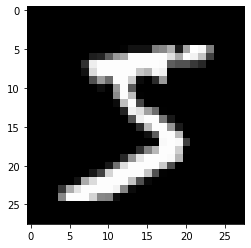

In [47]:
plt.imshow(x_train_new[0] , cmap="gray")

In [48]:
## Use a special layer called dropout to avoid over fitting 
from tensorflow.keras.layers import Dropout

In [49]:
def create_model_2():
    model = Sequential()  # MLP Model
    model.add(Dense(64, activation="relu", input_shape=(28*28,)))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    model.summary()
    return model

model_2 = create_model_2()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


#### Let's train Model 2

In [50]:
# Make sure to use the new rescaled datasets x_train_new and x_test_new
history_2 = model_2.fit(x=x_train_new.reshape((60000, 28*28)), 
          y=y_train_vecs, 
          batch_size=64, 
          epochs=20, 
          verbose=1,
         validation_data=(x_test_new.reshape((10000, 28*28)), y_test_vecs))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4971 - acc: 0.8497 - val_loss: 0.1815 - val_acc: 0.9456
Epoch 2/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2454 - acc: 0.9272 - val_loss: 0.1391 - val_acc: 0.9579
Epoch 3/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2024 - acc: 0.9389 - val_loss: 0.1274 - val_acc: 0.9603
Epoch 4/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1808 - acc: 0.9462 - val_loss: 0.1241 - val_acc: 0.9641
Epoch 5/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1629 - acc: 0.9520 - val_loss: 0.1098 - val_acc: 0.9680
Epoch 6/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1507 - acc: 0.9542 - val_loss: 0.1064 - val_acc: 0.9682
Epoch 7/20
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1411 - acc: 0.9566 - val_loss: 0

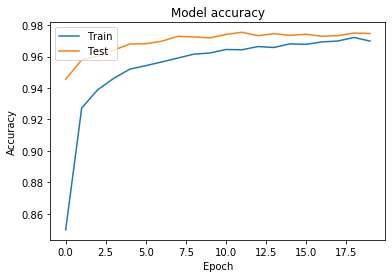

In [52]:
plot_keras_history(history_2)

## WOW ! 97.5% accuracy in validation

- Now with these changes we have got 97.5% accuracy . **But still we missed 2.5%** . We would examine them latter

- Model_2 inorporated following changes
    * Activation function of layes chnaged to "relu"
    * Layer dims increased to 64
    * Dropout added to avoid overfitting
    * Data rescaled

### Let's examine bad cases for which even our updtaed model doesn't work

In [54]:
y_pred_2 = model_2.predict_classes(x_test_new.reshape((10000,28*28)))
print("y_pred_2 : ", y_pred_2.shape)

y_pred_2 :  (10000,)


In [56]:
## First 20 bad examples
n = 20
i = 0
bad_cases_2 = []
for y_hat , y in zip(y_pred_2, y_test):
    if y_hat != y:
        bad_cases_2.append(i)
        if len(bad_cases_2) == n:
            break  
    i += 1
    
print(bad_cases_2)

[8, 18, 247, 259, 264, 318, 321, 381, 435, 445, 495, 543, 582, 610, 613, 674, 691, 717, 720, 740]


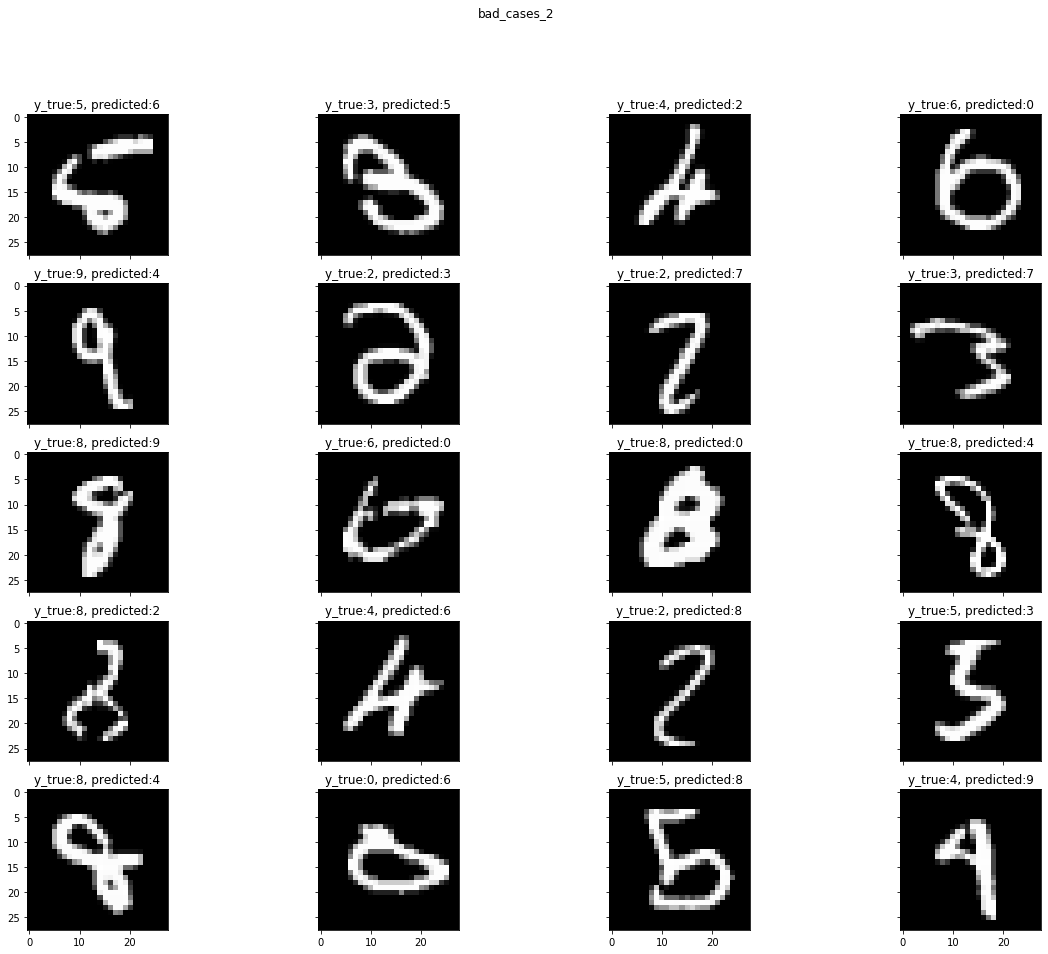

In [58]:
show_mnist(x_test[bad_cases_2], 
           y_pred_2[bad_cases_2], 
           y_test[bad_cases_2],
           n_rows=5, n_cols=4,
           title= "bad_cases_2")

## Those are really tough .. but we can achive > 99% accuracy with CNNs !

Done !